In [28]:
import os
import mne
import pandas as pd
import numpy as np

# Define file paths
data_directory = 'database/derivatives/ECoGBroadband/sub-p01/ses-umcuiemu01/ieeg'
file_name = 'sub-p01_ses-umcuiemu01_task-prf_run-01_desc-broadband_ieeg.vhdr'
file_path = os.path.join(data_directory, file_name)

# Load the raw data using MNE
raw = mne.io.read_raw_brainvision(file_path, preload =True)
sfreq = raw.info['sfreq']

# Load events from the corresponding events.tsv file
events_file_name = file_name.replace('_ieeg.vhdr', '_events.tsv')
events_file_path = os.path.join(data_directory, events_file_name)
events_df = pd.read_csv(events_file_path, delimiter="\t")

# Convert the events DataFrame to the MNE events format
event_samples = (events_df['onset'] * sfreq).astype(int)
unique_event_labels = events_df['trial_type'].astype(str).unique()  # Convert to string
event_id = {label: idx for idx, label in enumerate(unique_event_labels)}
event_nums = events_df['trial_type'].astype(str).map(event_id).values  # Convert to string
mne_events = np.column_stack([event_samples, np.zeros_like(event_samples), event_nums])


# Epoching the data
tmin, tmax = -0.5, 1.5
epochs = mne.Epochs(raw, mne_events, event_id=event_id, tmin=tmin, tmax=tmax, baseline=None, preload=True)

# Extract ERP data for each event type
erp_data = {}
for key in event_id.keys():
    erp_data[key] = epochs[key].average().data
print("this is the data preprocessing part of the code")


Extracting parameters from database/derivatives/ECoGBroadband/sub-p01/ses-umcuiemu01/ieeg\sub-p01_ses-umcuiemu01_task-prf_run-01_desc-broadband_ieeg.vhdr...
Setting channel info structure...
Reading 0 ... 419839  =      0.000 ...   204.999 secs...
Not setting metadata
224 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 224 events and 4097 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use i

In [36]:
avail_con=list(erp_data.keys())
channel_names = raw.ch_names  # Get channel names from the raw data

# Ensure that the channel names in the `rois` dictionary are valid indices
for component, ch_indices in rois.items():
    rois[component] = [channel_names.index(ch_name) for ch_name in ch_indices if ch_name in channel_names]

# Compute mean amplitudes for the regions of interest (ROIs)
# Averaging the ERP data for each region of interest across channels for the specified conditions

mean_amplitudes_corrected = {}

for component, ch_names in rois.items():
    ch_indices = [raw.ch_names.index(ch) for ch in ch_names if ch in raw.ch_names]  # Getting indices of the channels
    
    # If there are valid channels for the component, proceed
    if ch_indices:
        mean_amplitudes_corrected[component] = {
            avail_con[0]: np.mean([erp_data[avail_con[0]][:, idx] for idx in ch_indices], axis=0),
            avail_con[1]: np.mean([erp_data[avail_con[1]][:, idx] for idx in ch_indices], axis=0)
        }
    else:
        mean_amplitudes_corrected[component] = {
            avail_con[0]: np.array([]),
            avail_con[1]: np.array([])
        }

mean_amplitudes_corrected




{'P300': {'3': array([], dtype=float64), '4': array([], dtype=float64)},
 'N170': {'3': array([], dtype=float64), '4': array([], dtype=float64)}}

NaN values in data1: False
NaN values in data2: False
Infinite values in data1: False
Infinite values in data2: False


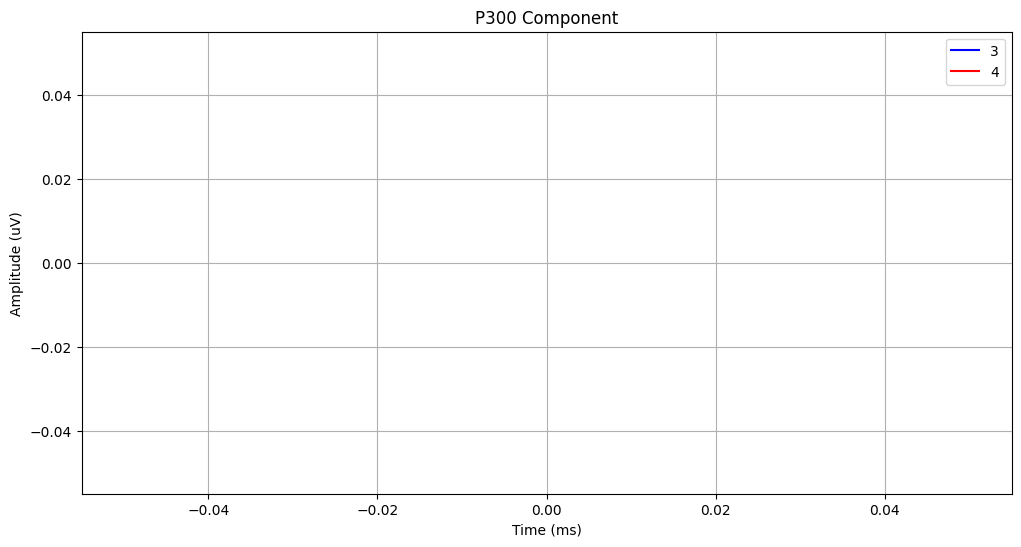

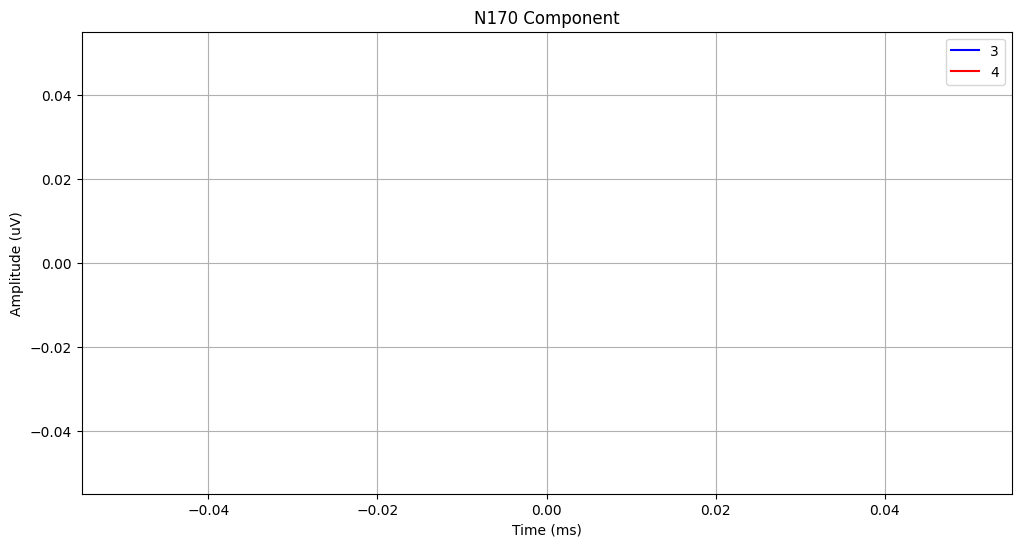

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Data Inspection


nan_in_data1 = np.isnan(mean_amplitudes_corrected['P300'][avail_con[0]]).any()
nan_in_data2 = np.isnan(mean_amplitudes_corrected['P300'][avail_con[1]]).any()
inf_in_data1 = np.isinf(mean_amplitudes_corrected['P300'][avail_con[0]]).any()
inf_in_data2 = np.isinf(mean_amplitudes_corrected['P300'][avail_con[1]]).any()

print(f"NaN values in data1: {nan_in_data1}")
print(f"NaN values in data2: {nan_in_data2}")
print(f"Infinite values in data1: {inf_in_data1}")
print(f"Infinite values in data2: {inf_in_data2}")

# Step 2: Visualization

# P300
plt.figure(figsize=(12, 6))
plt.plot(mean_amplitudes_corrected['P300'][avail_con[0]], label=avail_con[0], color='blue')
plt.plot(mean_amplitudes_corrected['P300'][avail_con[1]], label=avail_con[1], color='red')
plt.legend()
plt.title("P300 Component")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude (uV)")
plt.grid(True)
plt.show()

# N170
plt.figure(figsize=(12, 6))
plt.plot(mean_amplitudes_corrected['N170'][avail_con[0]], label=avail_con[0], color='blue')
plt.plot(mean_amplitudes_corrected['N170'][avail_con[1]], label=avail_con[1], color='red')
plt.legend()
plt.title("N170 Component")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude (uV)")
plt.grid(True)
plt.show()


In [35]:
# Checking the shape of data1 and data2
shape_data1 = data1.shape
shape_data2 = data2.shape

shape_data1, shape_data2


((), ())

TypeError: Invalid shape () for image data

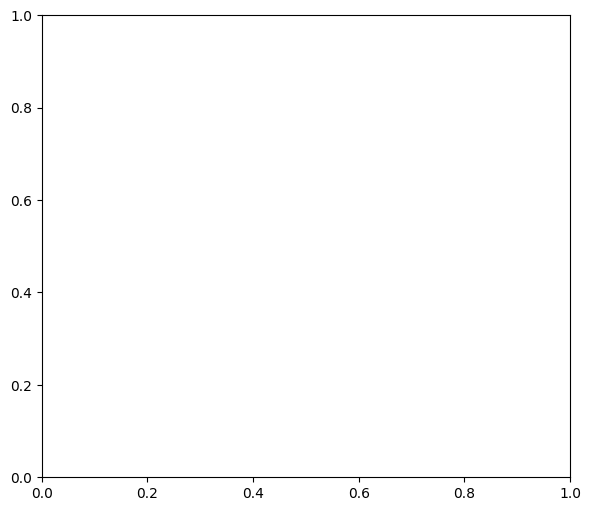

In [33]:
# First, let's calculate the proportion of NaN values in data1 and data2
nan_data1_proportion = np.isnan(data1).sum() / data1.size
nan_data2_proportion = np.isnan(data2).sum() / data2.size

# Next, let's visualize where these NaN values are located
plt.figure(figsize=(15, 6))

# Plot for data1
plt.subplot(1, 2, 1)
plt.imshow(np.isnan(data1), aspect='auto', cmap='gray_r', origin='lower', interpolation='none')
plt.colorbar(label='NaN value')
plt.title(f"NaN values in data1 (Proportion: {nan_data1_proportion:.2%})")
plt.xlabel("Time Point")
plt.ylabel("Channel")

# Plot for data2
plt.subplot(1, 2, 2)
plt.imshow(np.isnan(data2), aspect='auto', cmap='gray_r', origin='lower', interpolation='none')
plt.colorbar(label='NaN value')
plt.title(f"NaN values in data2 (Proportion: {nan_data2_proportion:.2%})")
plt.xlabel("Time Point")
plt.ylabel("Channel")

plt.tight_layout()
plt.show()
